In [130]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
# Read in our data
df = pd.read_csv("country-data.csv")
df.head(3)

Country Continent  Year  GDP_per_capita  life_expectancy  Population
0  Afghanistan      Asia  1950      757.318795           26.674     8151455
1  Afghanistan      Asia  1951      766.752197           26.932     8276820
2  Afghanistan      Asia  1952      779.445314           27.448     8407148

# Small multiples with `plt.subplots`

There are a few ways to make **small multiples** using `pandas`/`matplotlib`.

We've been using `plt.subplots` so far to yell at `matplotlib`, "hey, prepare a graph!". Then when we use `df.plot` we pass `ax` to put all of our data into that one particular graph.

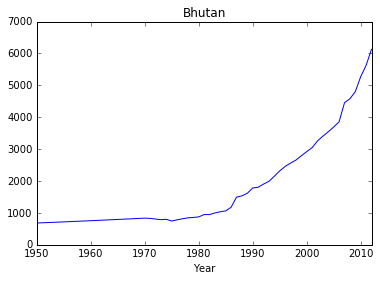

In [26]:
# Have one subplot
fig, ax = plt.subplots()
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax, legend=False)
ax.set_title("Bhutan")

## Passing `ax` around

If we use `.plot` twice but give them both the same `ax`, the elements will be plotted on the same graph.

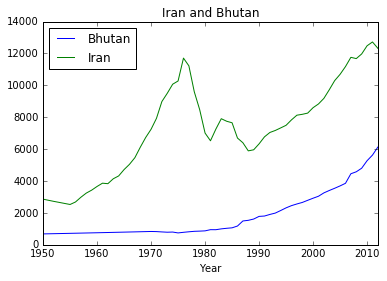

In [50]:
# One subplot again
fig, ax = plt.subplots()

# Use ax for both
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax, label='Bhutan')
df[df['Country'] == 'Iran'].plot(x='Year', y='GDP_per_capita', ax=ax, label='Iran')
ax.set_title("Iran and Bhutan")

# Having multiple `ax`

We can receive *multiple `ax` elements from `.subplots`*. Below we're using `nrows=` and `ncols` to ask for two rows of graphics, each row having one column.

> **Note:** The next one is nicer than this one because it shares x and y axes.

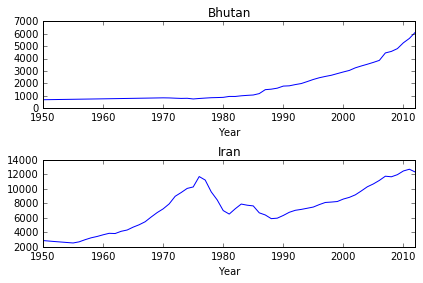

In [51]:
# Asking for TWO subplots, ax1 and ax2.
# Be sure to put them in parenthesis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Use ax1 to plot Bhutan
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax1)
ax1.set_title("Bhutan")

# Use ax2 to plot Iran
df[df['Country'] == 'Iran'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax2)
ax2.set_title("Iran")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

See how it looks like they're both making a lot of money in the end? Unfortunately **that's not true**. If you look at the y-axis labels, you'll see Iran peaks at around a GDP of \$13k Bhutan only gets up to about \$6k. In order to make the x and y axes match up, **you need to pass `sharex` and `sharey` to your `plt.subplots`.**

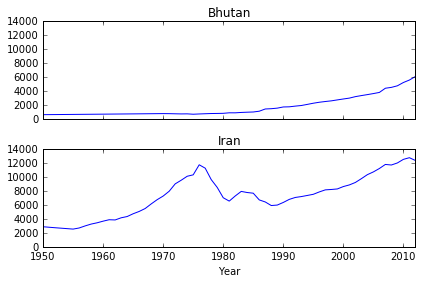

In [53]:
# Receive ax1 and ax2 - note that they go in parens
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# Use ax1 to plot Bhutan
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax1)
ax1.set_title("Bhutan")

# Use ax2 to plot Iran
df[df['Country'] == 'Iran'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax2)
ax2.set_title("Iran")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

# Expanding with nrows and ncols

You could do this with a million different graphics!

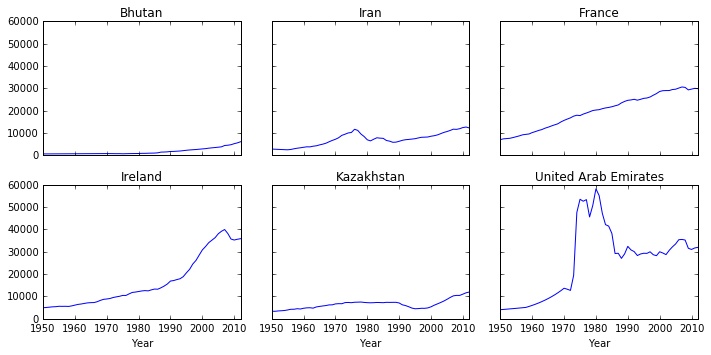

In [54]:
# Beacuse I'm asking for two rows of three columns each,
# I need to separate them out with even MORE parentheses
# Using figsize to make the figure a little bigger, 10"x5"
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))

# Doing each of these manually (ugh)
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax1)
ax1.set_title("Bhutan")
df[df['Country'] == 'Iran'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax2)
ax2.set_title("Iran")
df[df['Country'] == 'France'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax3)
ax3.set_title("France")
df[df['Country'] == 'Ireland'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax4)
ax4.set_title("Ireland")
df[df['Country'] == 'Kazakhstan'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax5)
ax5.set_title("Kazakhstan")
df[df['Country'] == 'United Arab Emirates'].plot(x='Year', y='GDP_per_capita', legend=False, ax=ax6)
ax6.set_title("United Arab Emirates")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

# Simplifying

That's a little too complicated for my tastes, though. How are you going to get all of those into a loop? **Short answer: you aren't.** Let's try it a different way.

Instead of getting all of the subplots at once, we'll get them one at a time by using `plt.subplot`, the singular version of `plt.subplots`.

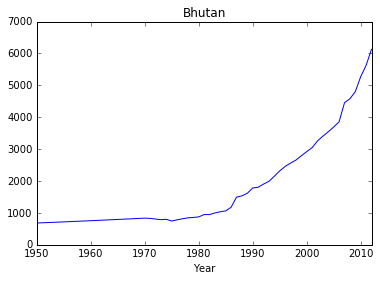

In [77]:
# 1 row, 1 column, and we'd like the first element.
ax = plt.subplot(1, 1, 1)
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax, legend=False)
ax.set_title("Bhutan")

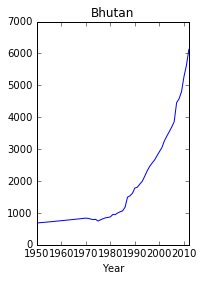

In [78]:
# 1 row, 2 columns, and we'd like the first element.
ax = plt.subplot(1, 2, 1)
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax, legend=False)
ax.set_title("Bhutan")

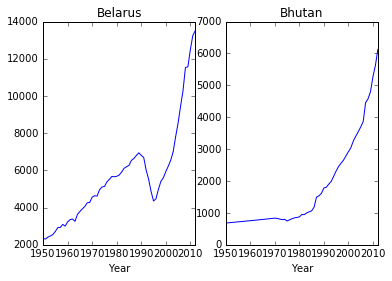

In [79]:
# 1 row, 2 columns, and we'd like the second element.
ax1 = plt.subplot(1, 2, 1)
df[df['Country'] == 'Belarus'].plot(x='Year', y='GDP_per_capita', ax=ax1, legend=False)
ax1.set_title("Belarus")

# 1 row, 2 columns, and we'd like the first element.
ax2 = plt.subplot(1, 2, 2)
df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax2, legend=False)
ax2.set_title("Bhutan")

## Make it a loop

In [121]:
len(df.groupby("Country"))

188

So we need 188 different graphs. If we put 15 columns on each row, that's 12.53 rows - round that up to 13.

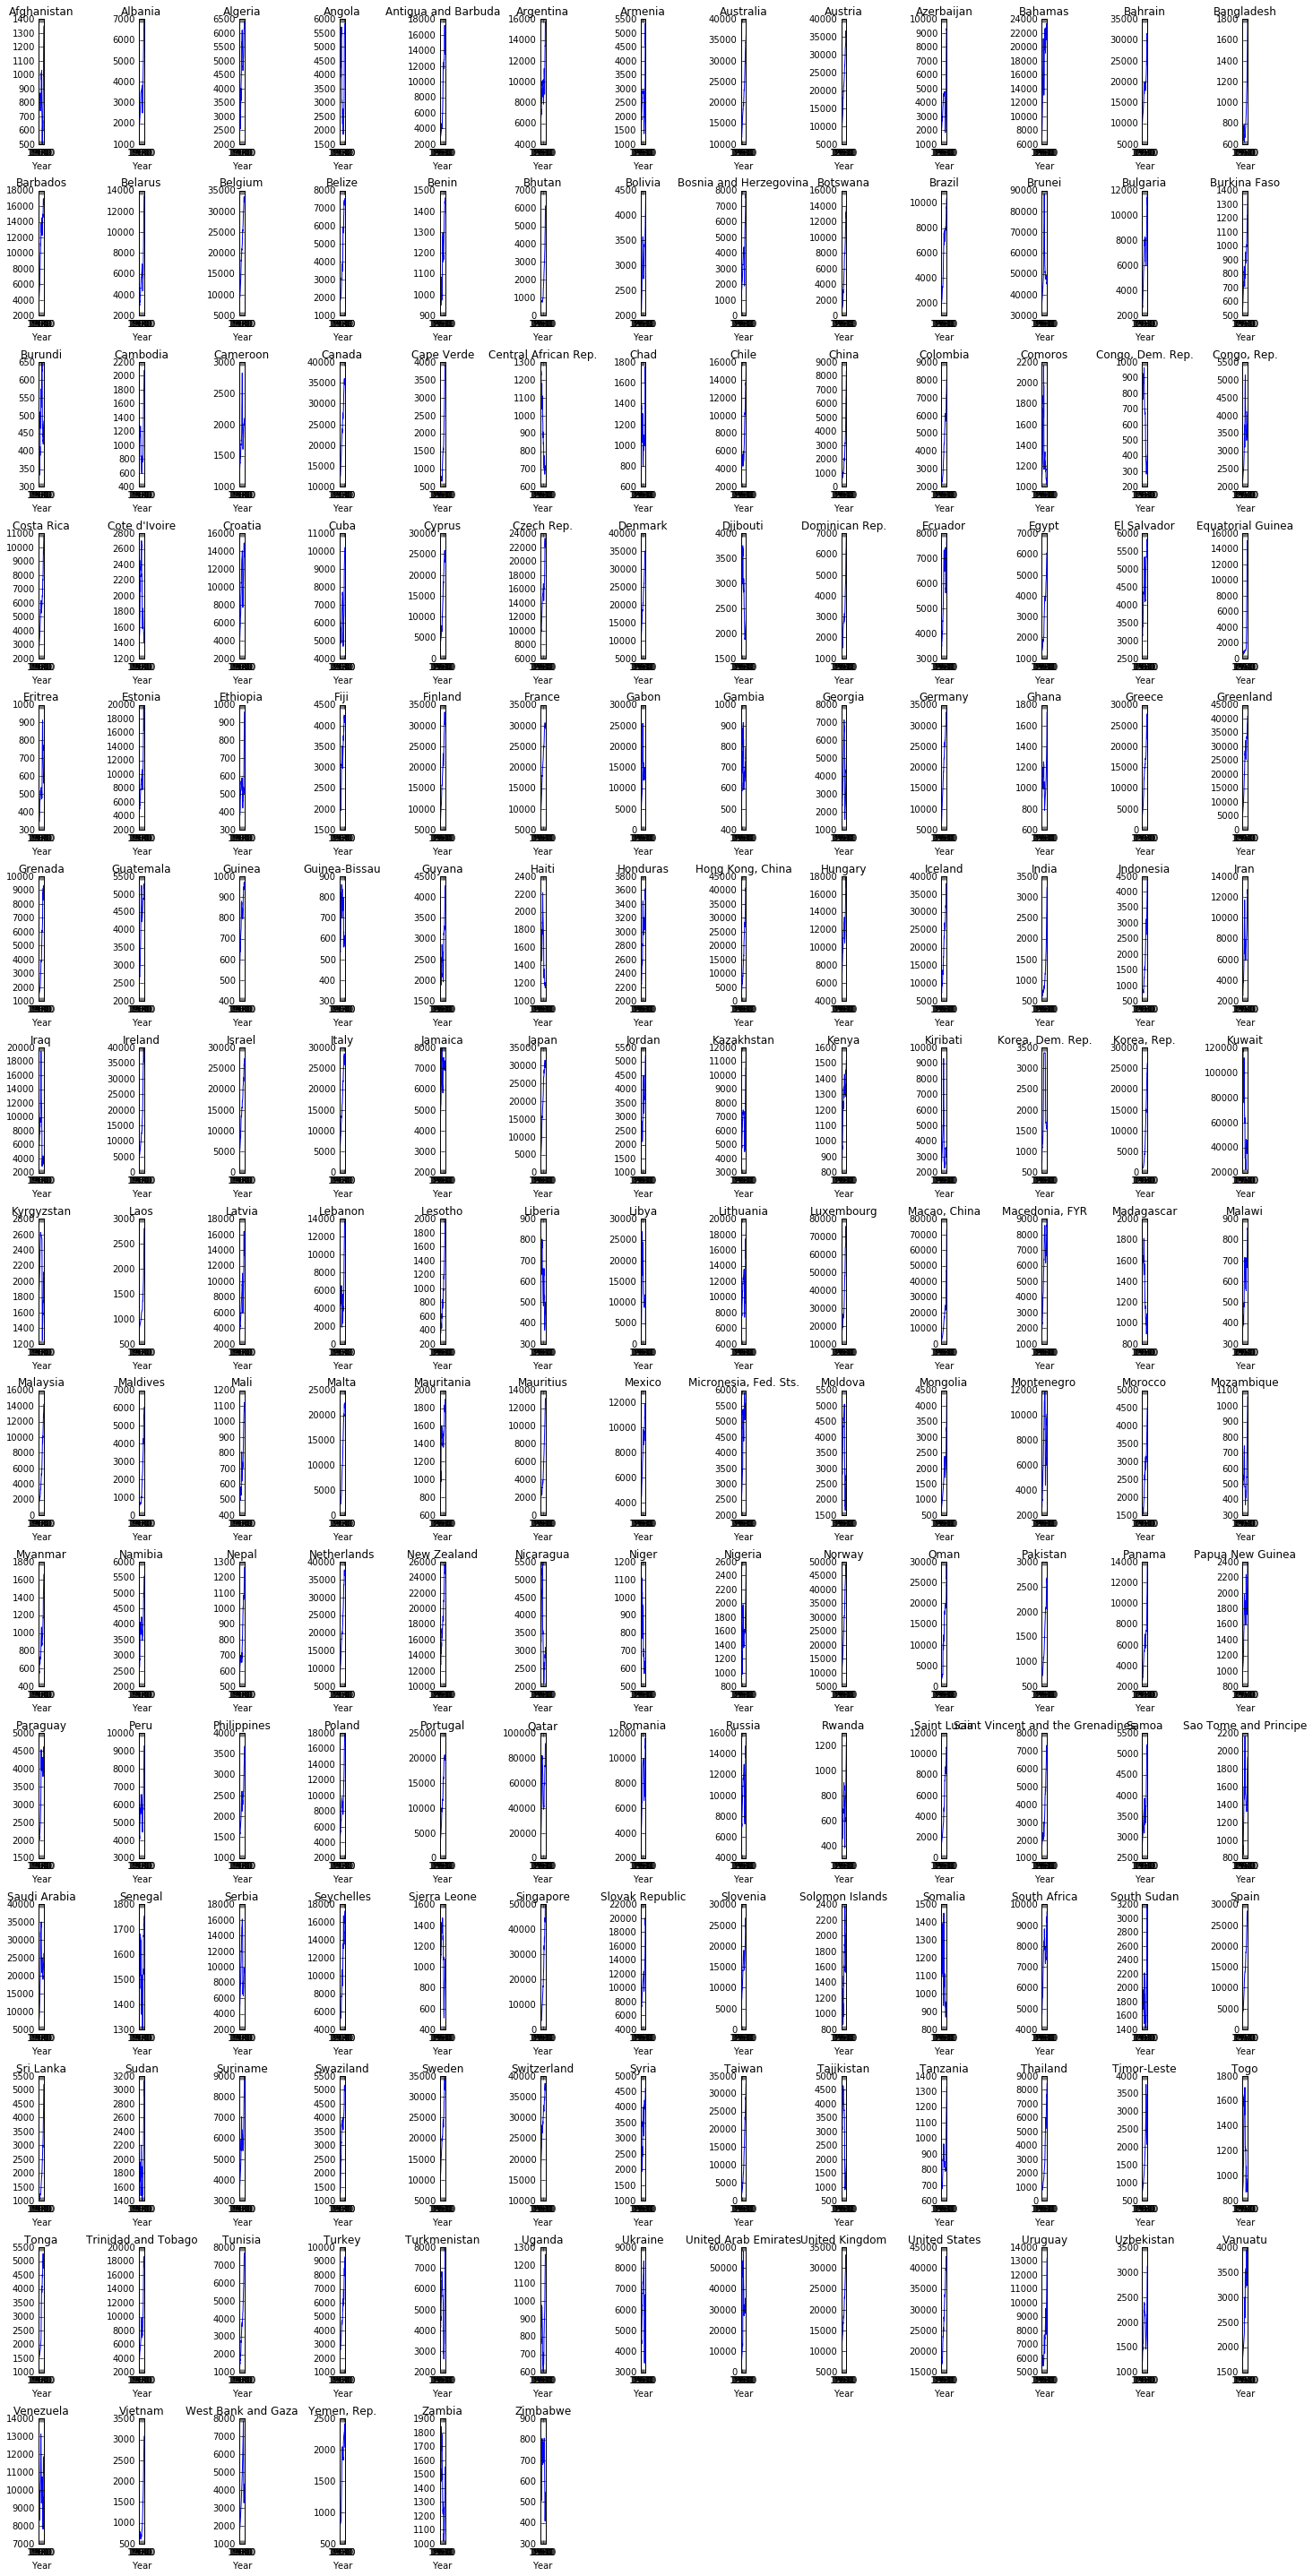

In [124]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for countryname, selection in df.groupby("Country"):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(15, 13, plot_number)
    selection.plot(x='Year', y='GDP_per_capita', ax=ax, label=countryname, legend=False)
    ax.set_title(countryname)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

# I take it back

Maybe the best way to do this is actually to use subplots! With the `sharex` and `sharey` it certainly seems more effective. We'll just need **a way to pull off one subplot at a time**, instead of doing a huge big `((ax1, ax...))` disaster.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc3dda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110228828>]], dtype=object)

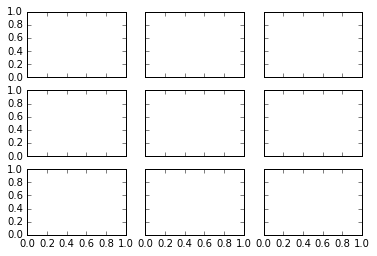

In [106]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
axes

Right now it's 3 lists of 3 axes, which will be hard to loop over.

In [107]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc3dda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110228828>]], dtype=object)

Luckily we can easily convert it to just one long list using a weird list comprehension

In [108]:
# http://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
[item for sublist in axes for item in sublist] 

And take parts off one at a time

In [109]:
axes_list = [item for sublist in axes for item in sublist] 

In [110]:
# We have 9
len(axes_list)

9

In [111]:
# Remove the first one, save it as 'ax'
ax = axes_list.pop(0)
ax

In [112]:
# Only 8 left now
len(axes_list)

8

In [113]:
ax = axes_list.pop(0)
ax

In [114]:
# Only have 7 left now
len(axes_list)

7

And we can just keep on doing down, plucking them off one at a time.

## Putting it together

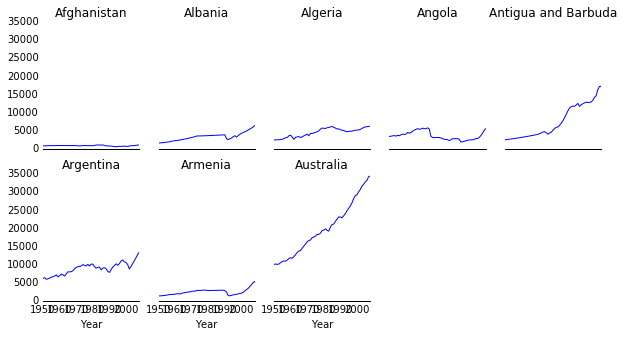

In [146]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in df.head(1200).groupby("Country"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

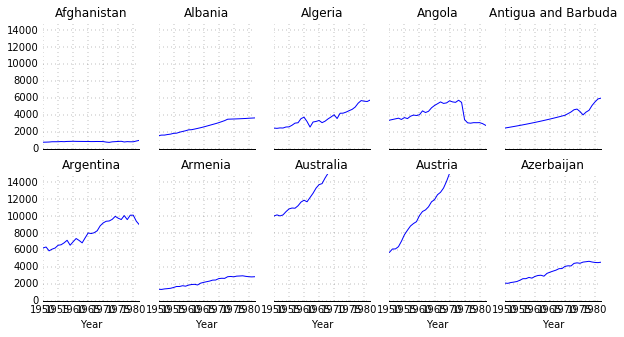

In [154]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in df.head(1200).groupby("Country"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_ylim((0, 15000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

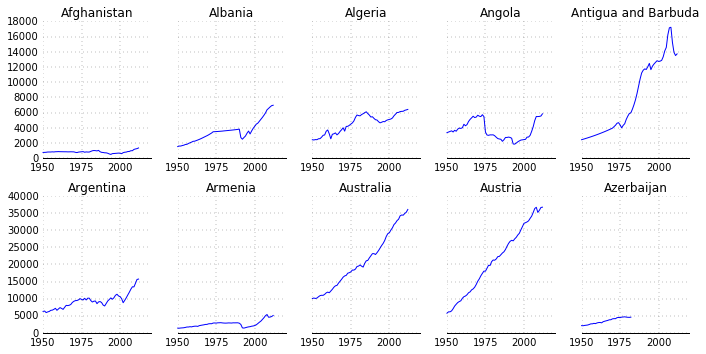

In [169]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey='row', figsize=(10,5))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in df.head(1200).groupby("Country"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False, clip_on=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((1950, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1950, 2015, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

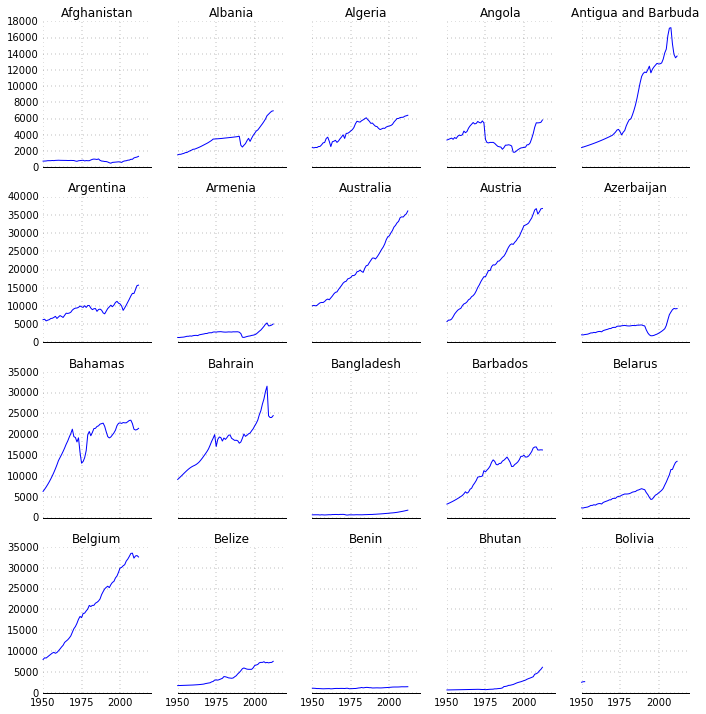

In [171]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey='row', figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in df.head(1200).groupby("Country"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False, clip_on=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((1950, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1950, 2015, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

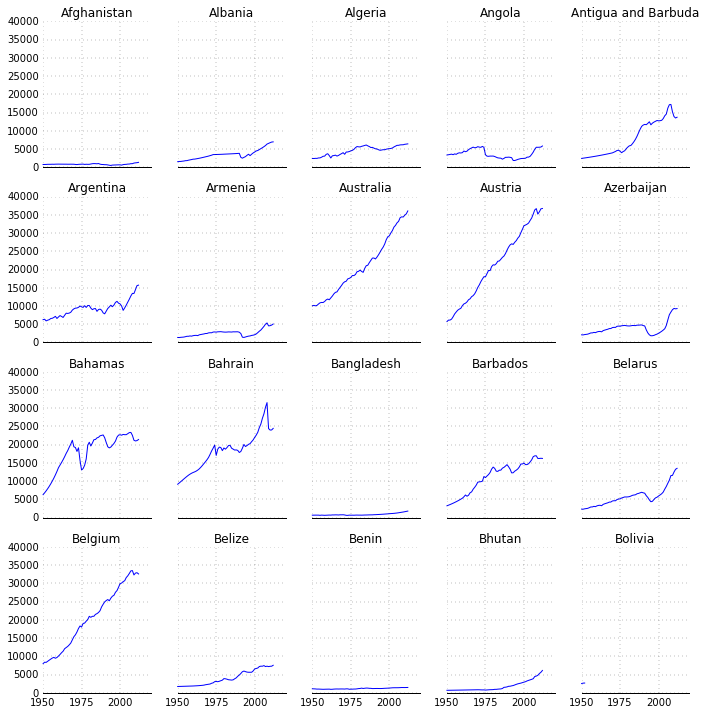

In [172]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in df.head(1200).groupby("Country"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False, clip_on=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((1950, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1950, 2015, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

# Let's put them in order

In [183]:
sample_df = df.head(1200)
# We could order by the max or the min but I'm
# going to get the LAST VALUE. using... .last().
# You could also use .max() or whatever.
sample_df.groupby("Country")['GDP_per_capita'].last().sort_values(ascending=False)

Country
Austria                36731.628770
Australia              36064.737280
Belgium                32585.011970
Bahrain                24472.896240
Bahamas                21418.229810
Barbados               16233.413790
Argentina              15714.103180
Antigua and Barbuda    13722.986160
Belarus                13515.161030
Azerbaijan              9291.026270
Belize                  7550.138241
Albania                 6969.306283
Algeria                 6419.127829
Bhutan                  6130.862355
Angola                  5838.155376
Armenia                 5059.087964
Bolivia                 2677.326347
Bangladesh              1792.550235
Benin                   1464.138255
Afghanistan             1349.696941
Name: GDP_per_capita, dtype: float64

In [184]:
# This is an ordered list of the names
sample_df.groupby("Country")['GDP_per_capita'].last().sort_values(ascending=False).index

Index(['Austria', 'Australia', 'Belgium', 'Bahrain', 'Bahamas', 'Barbados',
       'Argentina', 'Antigua and Barbuda', 'Belarus', 'Azerbaijan', 'Belize',
       'Albania', 'Algeria', 'Bhutan', 'Angola', 'Armenia', 'Bolivia',
       'Bangladesh', 'Benin', 'Afghanistan'],
      dtype='object', name='Country')

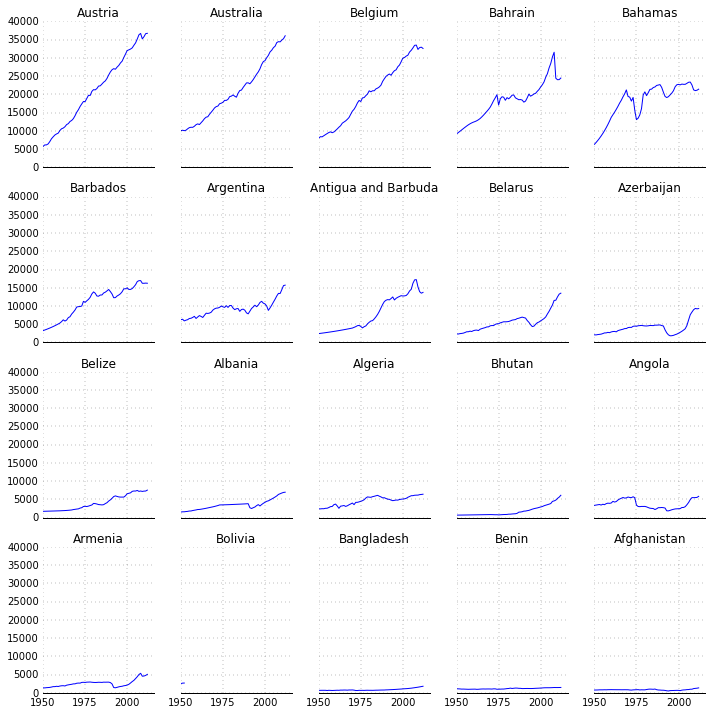

In [187]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 

ordered_country_names = grouped['GDP_per_capita'].last().sort_values(ascending=False).index

# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = df.head(1200).groupby("Country")

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((1950, 2016))
    ax.set_xlabel("")
    ax.set_xticks(range(1950, 2015, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

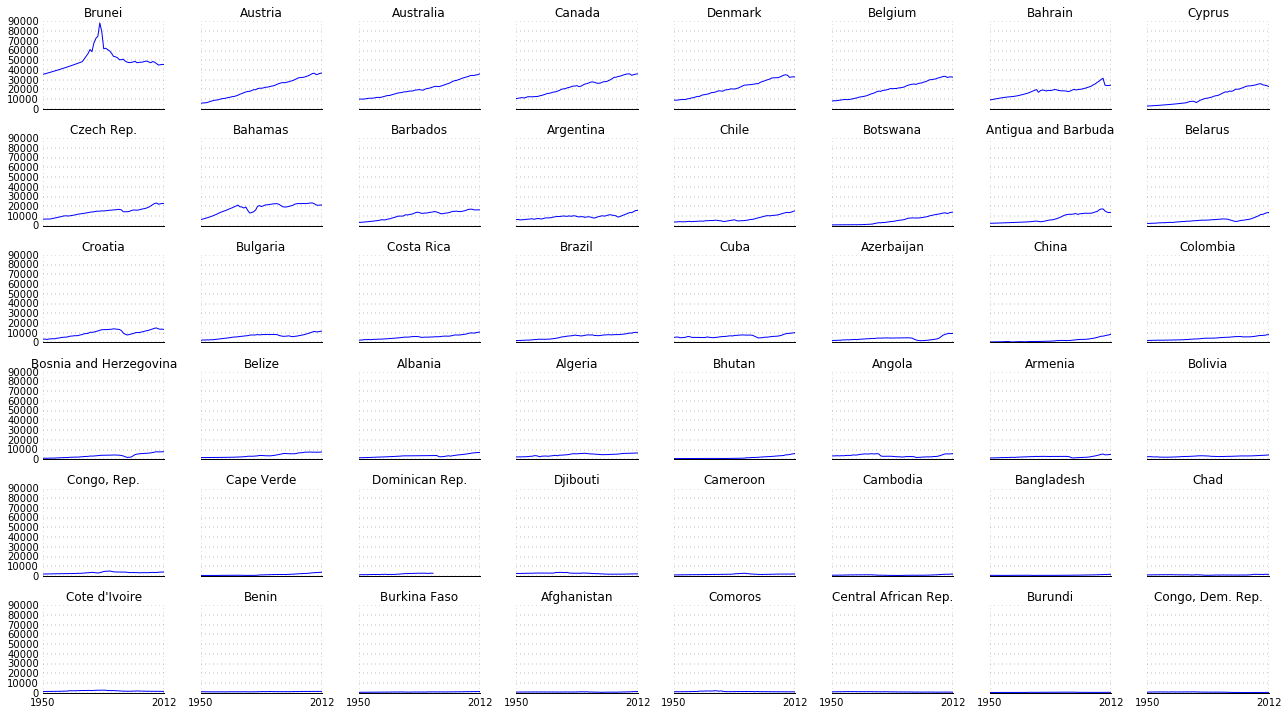

In [198]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=6, ncols=8, sharex=True, sharey=True, figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

ordered_country_names = grouped['GDP_per_capita'].last().sort_values(ascending=False).index

# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = df.head(3000).groupby("Country")

first_year = df['Year'].min()
last_year = df['Year'].max()

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=1)

plt.tight_layout()

In [203]:
df[df['Country'] == 'Cape Verde']['Year'].max()

2012

In [204]:
df[(df['Country'] == 'Cape Verde')][df['Year'] == 2012]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Country Continent  Year  GDP_per_capita  life_expectancy  Population
1952  Cape Verde    Africa  2012     3896.041139           74.771      505335

In [223]:
# So we want to plot at 
max_year = df[df['Country'] == 'Cape Verde']['Year'].max()
gdp_value = float(df[df['Country'] == 'Cape Verde'][df['Year'] == 2012]['GDP_per_capita'])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


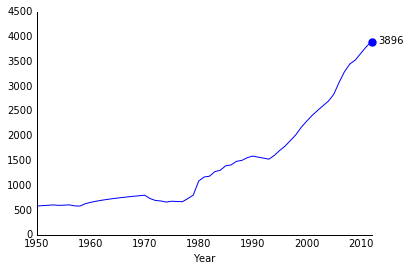

In [259]:
ax = df[df['Country'] == 'Cape Verde'].plot(x='Year', y='GDP_per_capita', legend=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(
    which='both',
    bottom='off',
    left='off',
    right='off',
    top='off'
)
plt.scatter(x= [max_year], y=[gdp_value], s=70, clip_on=False, linewidth=0)
plt.annotate(int(gdp_value), xy=[max_year, gdp_value], xytext=[7, -2], textcoords='offset points')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


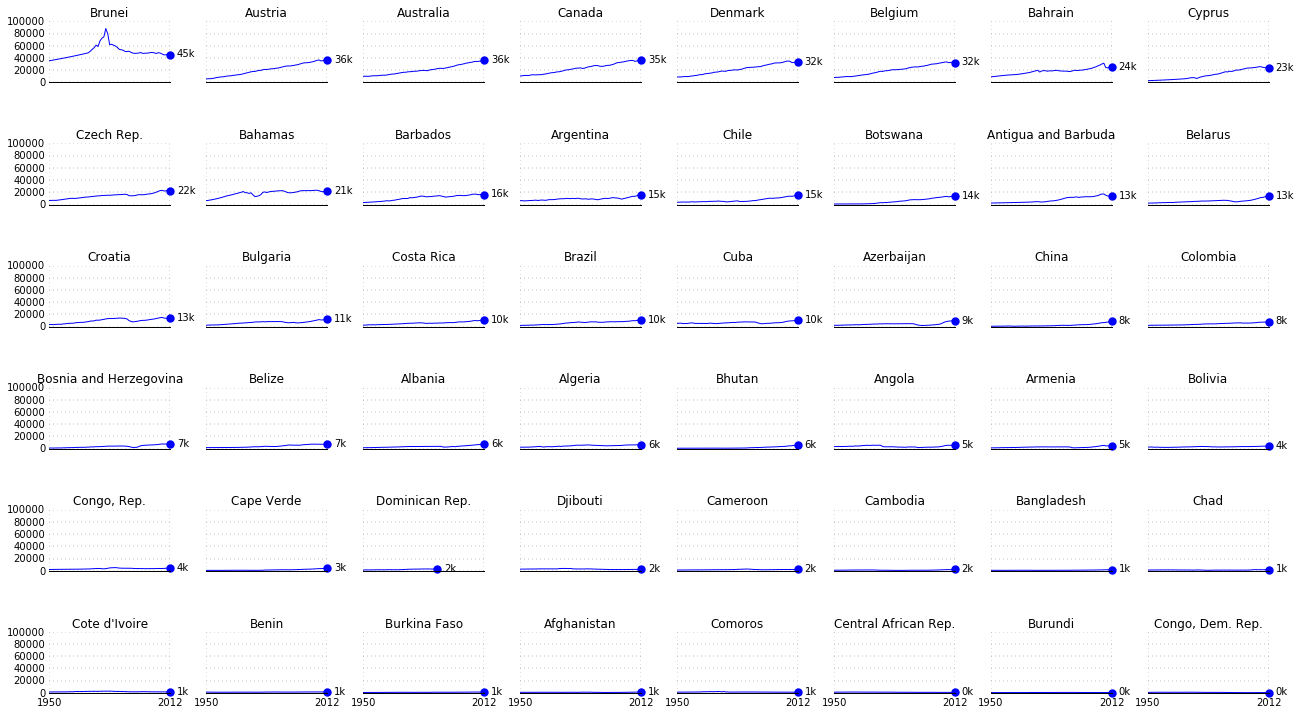

In [273]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=6, ncols=8, sharex=True, sharey=True, figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

ordered_country_names = grouped['GDP_per_capita'].last().sort_values(ascending=False).index

# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = df.head(3000).groupby("Country")

first_year = df['Year'].min()
last_year = df['Year'].max()

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)

    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    max_year = selection['Year'].max()
    gdp_value = float(selection[df['Year'] == max_year]['GDP_per_capita'])
    ax.set_ylim((0, 100000))
    ax.scatter(x=[max_year], y=[gdp_value], s=70, clip_on=False, linewidth=0)
    ax.annotate(str(int(gdp_value / 1000)) + "k", xy=[max_year, gdp_value], xytext=[7, -2], textcoords='offset points')

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()
plt.subplots_adjust(hspace=1)

In [ ]:
ax.scatter